In [47]:
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt


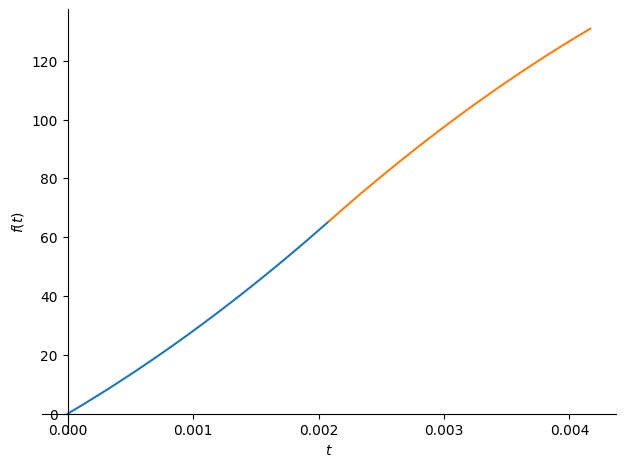

In [48]:
def chirp():
    
    preamble_f1 = 4000
    preamble_f2 = 6000
    preamble_length = 200
    sample_rate = 48000
    T = preamble_length/sample_rate

    t= sympy.symbols('t')

    phi_1 =2 * sympy.pi * ( (preamble_f2-preamble_f1) * (t**2/T) + preamble_f1*t )

    phi_2 =2 * sympy.pi * ( (preamble_f1-preamble_f2) * (t**2/T) + (2*preamble_f2-preamble_f1)*t + 
                            (preamble_f1-preamble_f2)*T/2 )

    p_phi_1 = sympy.plot(phi_1,(t,0,T/2),show=False)
    p_phi_2 = sympy.plot(phi_2,(t,T/2,T),show=False)

    p_phi_1.extend(p_phi_2)
    p_phi_1.show()

chirp()

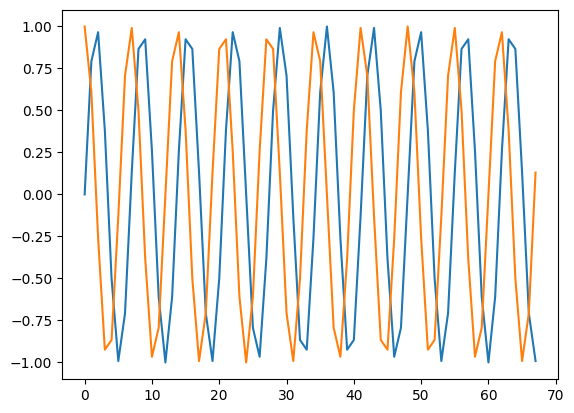

In [49]:
# chirp frequencies
f1 = 4000
f2 = 8000

# Sample rate (Hz)
sample_rate = 48000

# Carrier wave frequency
carrier_f = 7000

# base band signal frequency
base_f = 700

# How many samples the preamble uses in a chirp (the preamble contains two linear chirps)
preamble_N = 200

def gen_preamble(shift:int):

    T = preamble_N/sample_rate

    np_t1_shift = np.linspace(0+shift/sample_rate,T+shift/sample_rate,preamble_N)
    np_phi_1_shift = (f2-f1)*(np_t1_shift**2/T)+2*f1*np_t1_shift

    np_t2_shift = np.linspace(T+shift/sample_rate,2*T+shift/sample_rate,preamble_N)
    np_phi_2_shift = (f1-f2)*(np_t2_shift**2/T)+2*(2*f2-f1)*np_t2_shift-2*f2*T+2*f1*T

    np_phi_shift = np.concatenate((np_phi_1_shift,np_phi_2_shift))

    sig_shift = np.sin(np.pi*np_phi_shift)
    return sig_shift

# number of 0/1 signal
signal_N = 50

# number of samples each carrier_0/1
carrier_N = int(sample_rate/base_f)

carrier_0 = []
carrier_1 = []

for i in range(0,carrier_N):
    carrier_0.append(np.sin(2*np.pi*carrier_f*i/sample_rate))
    carrier_1.append(np.cos(2*np.pi*carrier_f*i/sample_rate))
    
plt.plot(carrier_0)
plt.plot(carrier_1)
plt.show()

def gen_random(len:int):
    ret = [];
    for i in range(0,len):
        if np.random.randint(0,2) == 0:
            ret+=carrier_0
        else:
            ret+=carrier_1
    return np.array(ret)



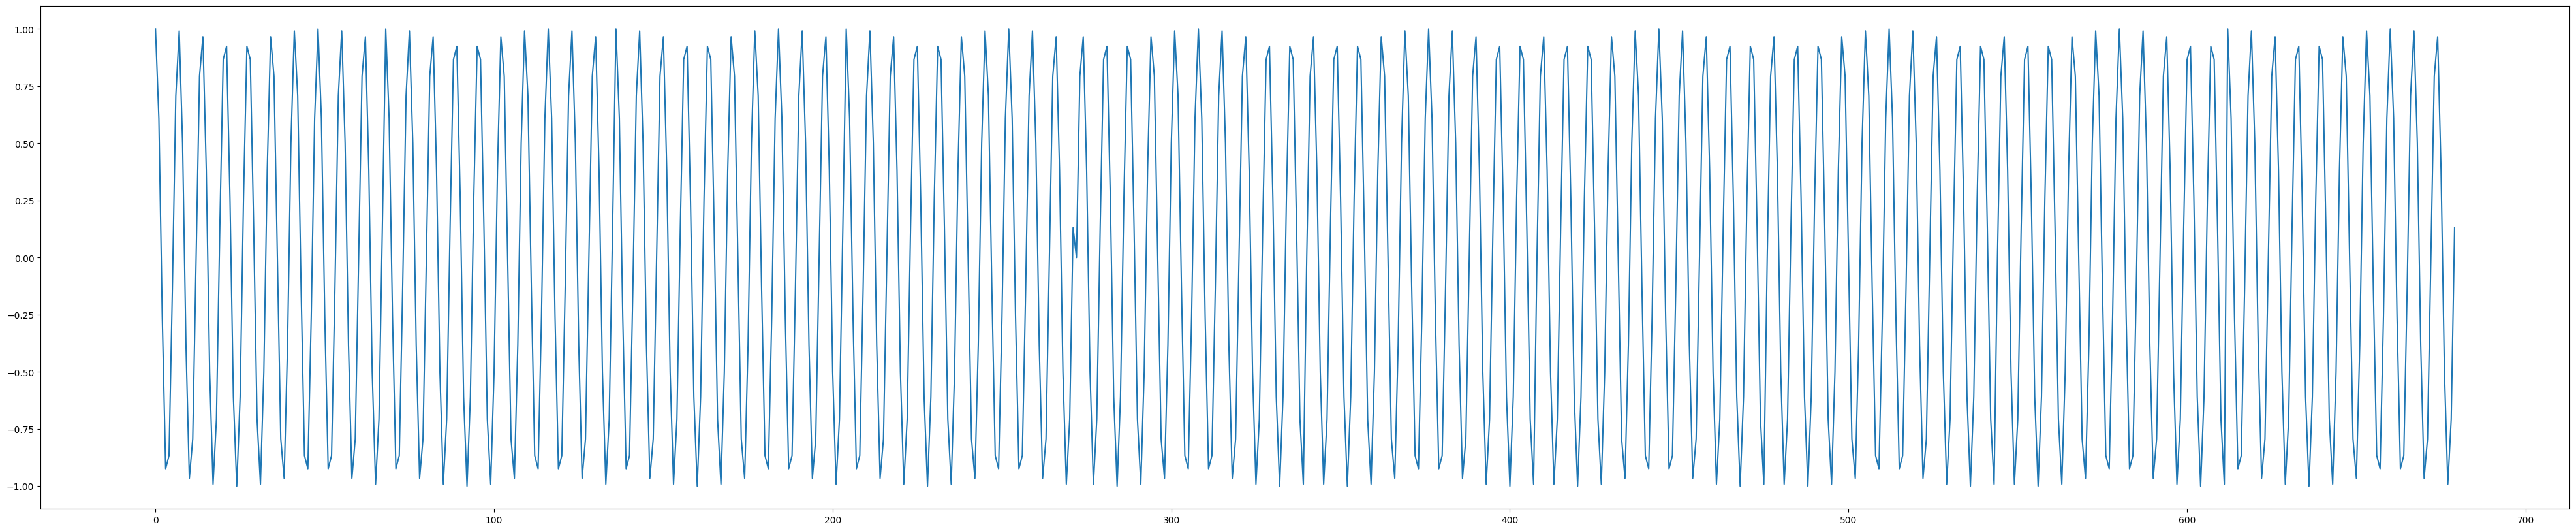

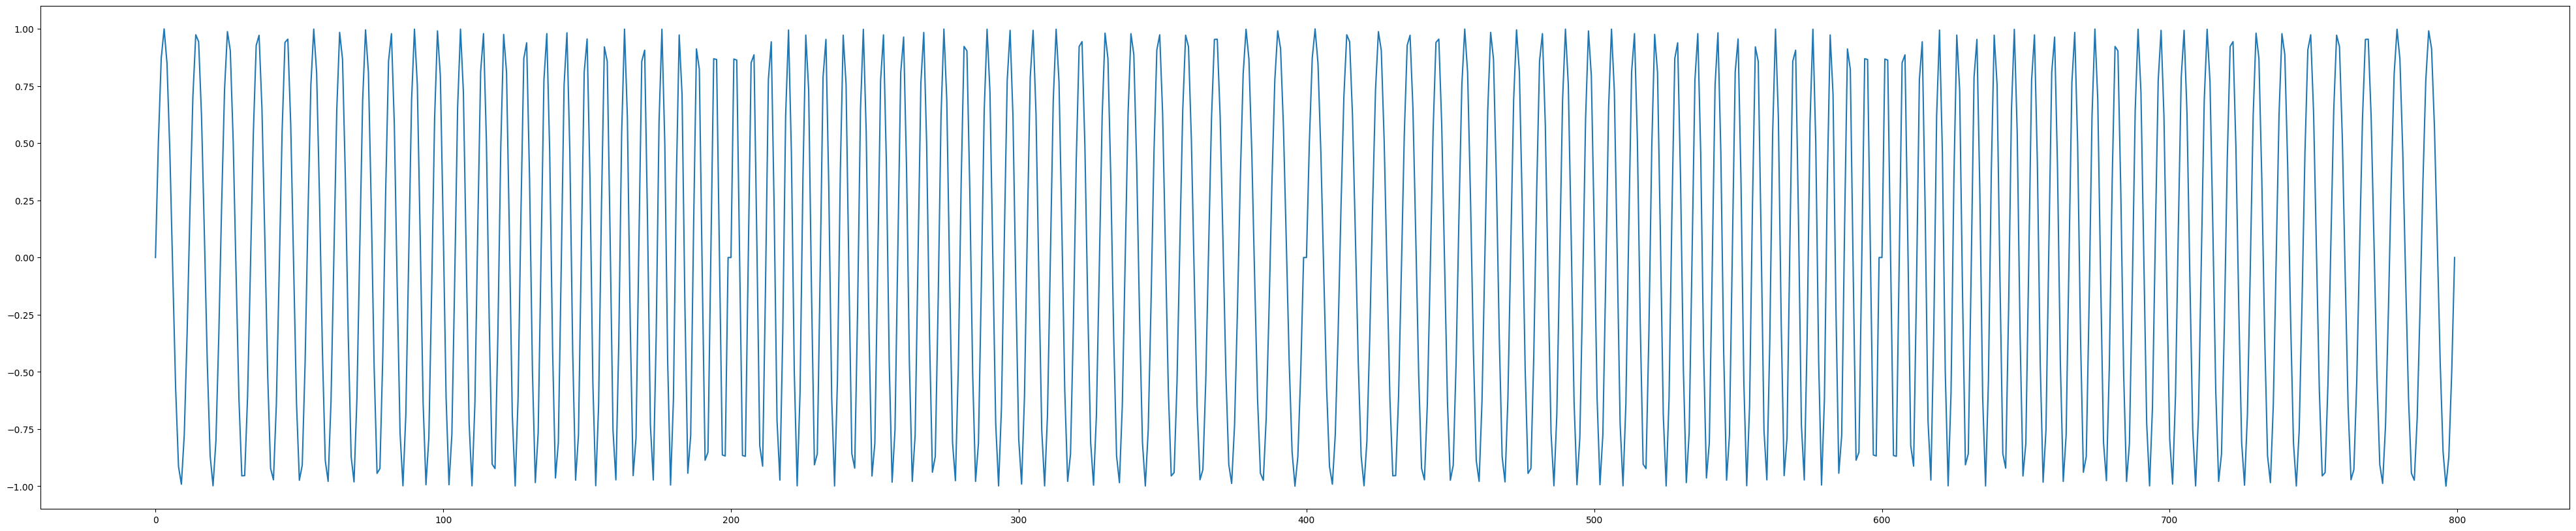

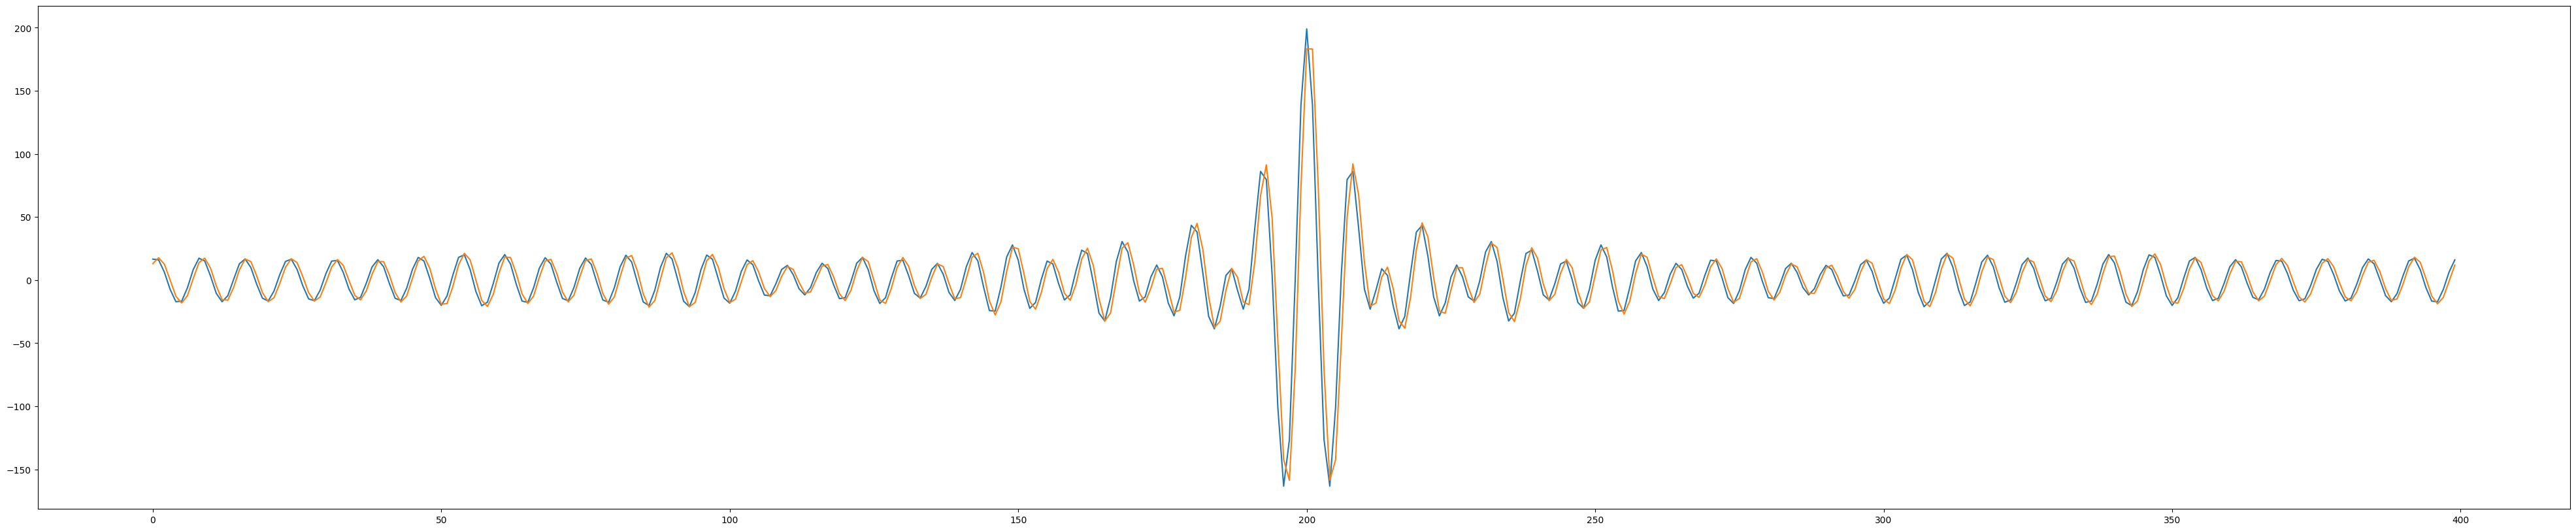

In [50]:
random_signal = gen_random(10)
plt.figure(figsize=(50,10))
plt.plot(random_signal)
plt.show()

preamble = gen_preamble(0)

plt.figure(figsize=(50,10))
plt.plot(np.concatenate((preamble,preamble)))
plt.show()

plt.figure(figsize=(50,10))
plt.plot(np.correlate(preamble,preamble,'same'))
plt.plot(np.correlate(preamble,gen_preamble(0.5),'same'))
plt.show()



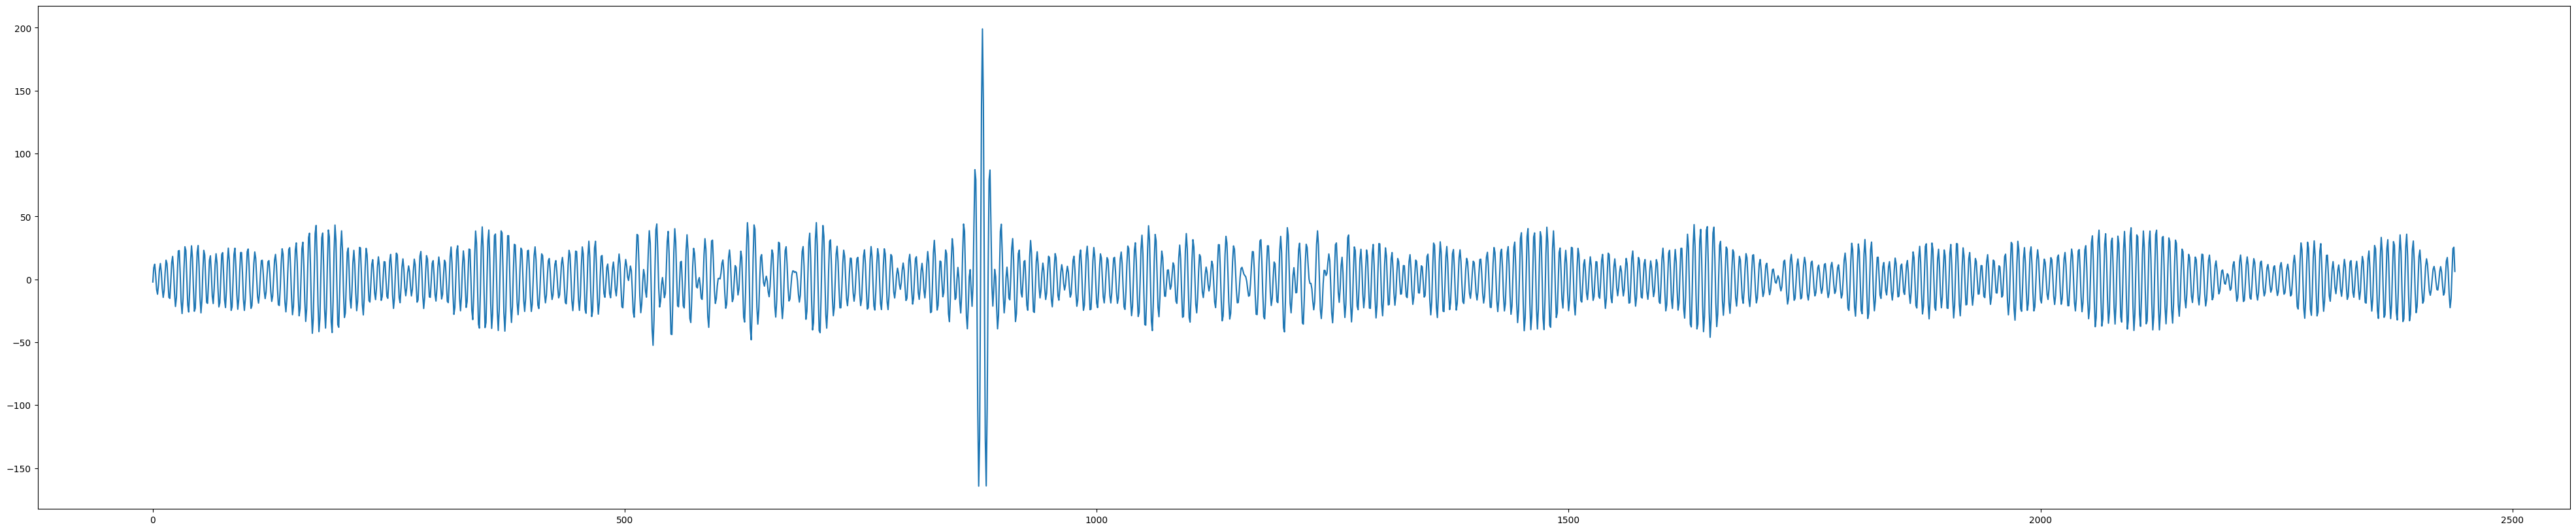

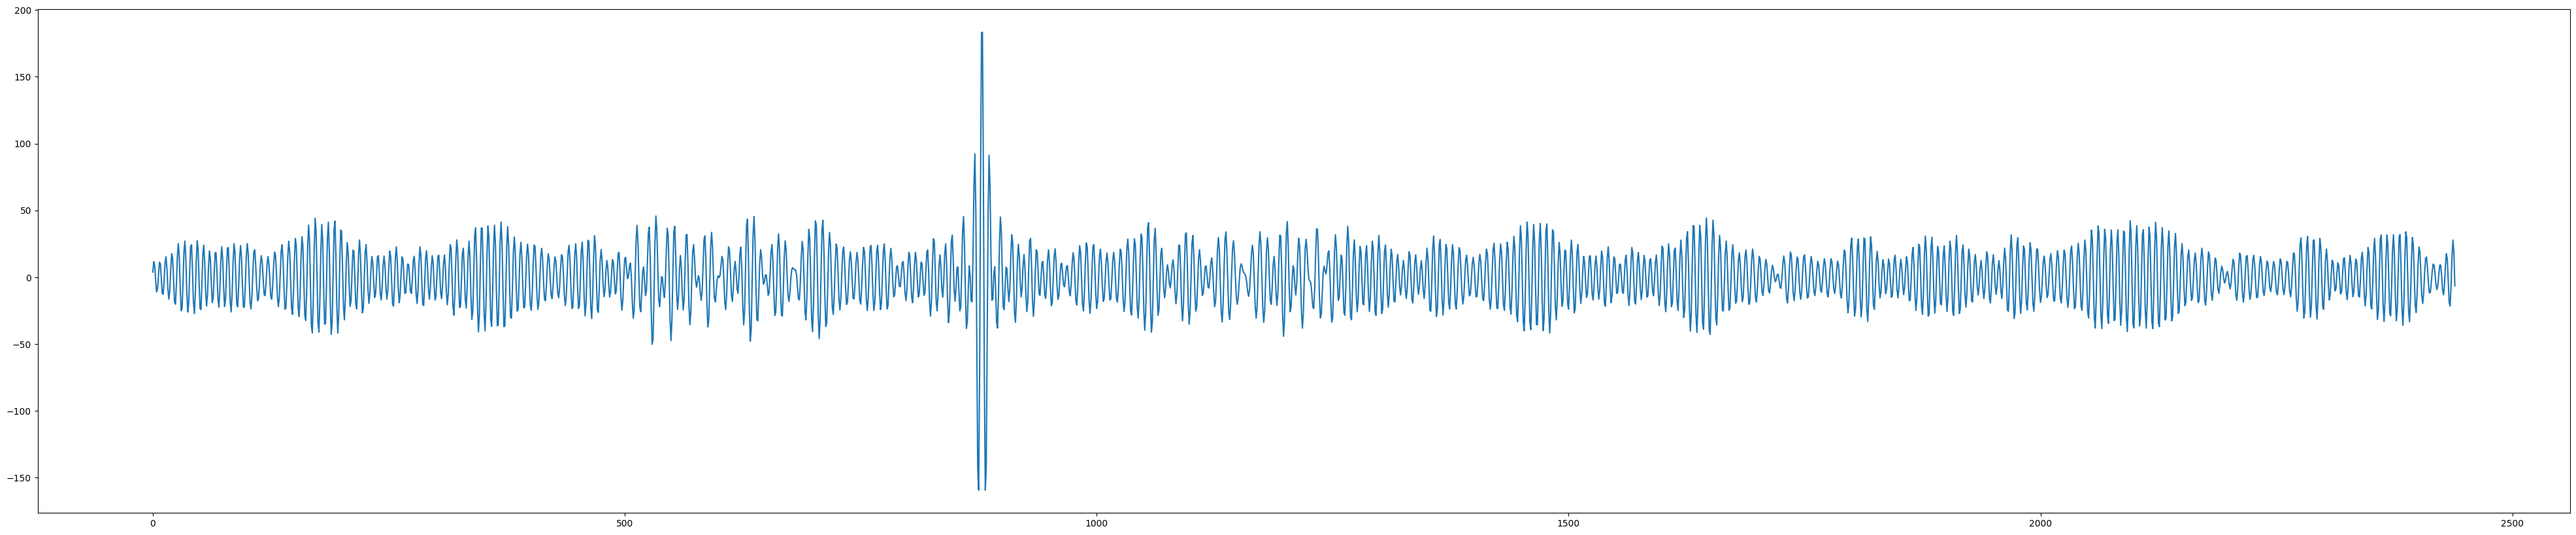

In [51]:

signal = np.concatenate((gen_random(20),gen_preamble(0),gen_random(10)))

plt.figure(figsize=(50,10))
plt.plot(np.correlate(preamble,signal,'same'))
plt.show()

plt.figure(figsize=(50,10))
plt.plot(np.correlate(gen_preamble(0.5),signal,'same'))
plt.show()
